In [1]:
import numpy as np
import os as os
from cymetric.pointgen.donaldson import Donaldson
from cymetric.pointgen.pointgen import PointGenerator

we define the pointgen

In [2]:
monomials = 5*np.eye(5, dtype=np.int)
coeff = np.ones(5)
kmoduli = np.ones(1)
ambient = np.array([4])
phi = 50
if phi != 0:
    monomials = np.concatenate(
        (monomials, np.expand_dims(np.ones(5, dtype=np.int), 0)))
coeff = np.concatenate((coeff, [phi]))

In [3]:
point_gen = PointGenerator(monomials, coeff, kmoduli, ambient)

generate validation point set

In [4]:
n_p = 10000
val_pws = point_gen.generate_point_weights(n_p, omega=True)
k = 6

run donaldson experiments

In [5]:
dns = [Donaldson(point_gen, i, log=2) for i in range(1,k)]

Donaldson:INFO:Generating 50100 point weights.
Donaldson:INFO:Point weights generated.
Donaldson:INFO:Applying T-operator for 10 iterations
Donaldson:INFO:Generating 52100 point weights.
Donaldson:INFO:Point weights generated.
Donaldson:INFO:Applying T-operator for 10 iterations
Donaldson:INFO:Generating 62100 point weights.
Donaldson:INFO:Point weights generated.
Donaldson:INFO:Applying T-operator for 10 iterations
Donaldson:INFO:Generating 98900 point weights.
Donaldson:INFO:Point weights generated.
Donaldson:INFO:Applying T-operator for 10 iterations
Donaldson:INFO:Generating 206100 point weights.
Donaldson:INFO:Point weights generated.
Donaldson:INFO:Applying T-operator for 10 iterations


compute sigma measures

In [6]:
sigma_measures = [d.sigma_measure(point_weights = val_pws) for d in dns]
sigma_measures

Donaldson:INFO:Computing sigma measure for 10000 points.
Donaldson:INFO:CY-volume: 7.992844119879056, K-vol: 1.000205604110206, ratio: 7.991201096088217.
Donaldson:INFO:Sigma measure: 0.24511040642407642.
Donaldson:INFO:Computing sigma measure for 10000 points.
Donaldson:INFO:CY-volume: 7.992844119879056, K-vol: 1.0005995162307169, ratio: 7.988055151164072.
Donaldson:INFO:Sigma measure: 0.2399630323720828.
Donaldson:INFO:Computing sigma measure for 10000 points.
Donaldson:INFO:CY-volume: 7.992844119879056, K-vol: 1.000111161703044, ratio: 7.991955720470516.
Donaldson:INFO:Sigma measure: 0.20333121755896894.
Donaldson:INFO:Computing sigma measure for 10000 points.
Donaldson:INFO:CY-volume: 7.992844119879056, K-vol: 1.0003356107278747, ratio: 7.990162535614641.
Donaldson:INFO:Sigma measure: 0.1495039107948041.
Donaldson:INFO:Computing sigma measure for 10000 points.
Donaldson:INFO:CY-volume: 7.992844119879056, K-vol: 0.9993649134031026, ratio: 7.997923493893038.
Donaldson:INFO:Sigma meas

[0.24511040642407642,
 0.2399630323720828,
 0.20333121755896894,
 0.1495039107948041,
 0.1107022423054291]

compute slope

In [7]:
from scipy import optimize
import matplotlib.pyplot as plt

In [11]:
def f(x, a, b):
    return a*x**-2 + b*x**-3# + c*x**-4

def residual(p, x, y):
    return y - f(x, *p)

p0 = [1., 1.]
x = np.array([float(i) for i in range(2,k)])
y = np.array(sigma_measures[1:])
popt, pcov = optimize.leastsq(residual, p0, args=(x, y))

In [12]:
popt

array([ 3.74033425, -5.56950107])

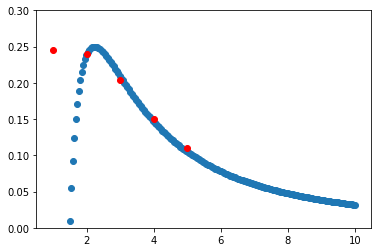

In [16]:
plt.plot([float(i) for i in range(1,k)], sigma_measures, 'or')
xn = np.linspace(1, 10, 200)
plt.scatter(xn, f(xn, *popt))
plt.ylim([0,0.3])
plt.show()